## Importar librerías y paquetes

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os 


## Carga y visualización de datasets

In [ ]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [ ]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [ ]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [27]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tratamiento de datos faltantes

In [ ]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Se eliminan los  campos Cabin y Ticket, no parecen ser de mucha utilidad



In [ ]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


Se analiza la distribución del campo Age para determinar que valor se puede imputar 

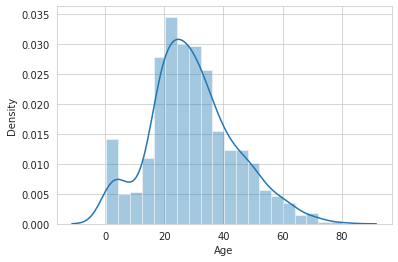

In [ ]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

La grafica nos muestra que los datos del campo Age están sesgados hacia la derecha, por lo tanto es mas adecuado completar los datos que faltan con la mediana en lugar de la media, ya que los altos valores a la derecha impactarían demasiado en el valor medio. También se completan los campos Embarked y Fare con 'S' y la mediana respectivamente.

In [ ]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)


Volvemos a listar los valores nulos para verificar

In [ ]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Ahora que eliminamos los valores faltantes, volvemos a listar los datos imputados

In [ ]:
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## Visualización de los datos

A continuación se analizan diferentes atributos para ver su incidencia en la prediccion final

##### <ins>Sexo</ins>

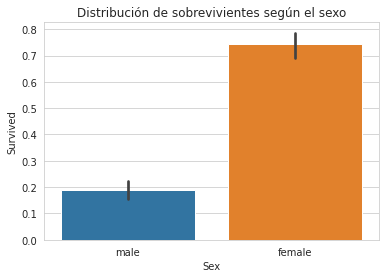

Total de personas que sobrevivieron: 342
Proporción de mujeres que sobrevivieron:
0.6812865497076024
Proporción de hombres que sobrevivieron:
0.31871345029239767


In [ ]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribución de sobrevivientes según el sexo")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total de personas que sobrevivieron: " + str((total_survived_females + total_survived_males)))
print("Proporción de mujeres que sobrevivieron:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proporción de hombres que sobrevivieron:")
print(total_survived_males/(total_survived_females + total_survived_males))

##### <ins>Clase</ins>

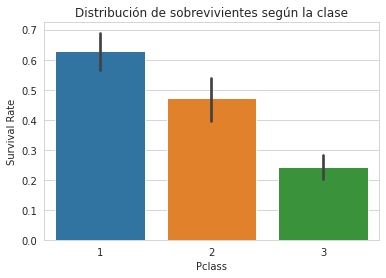

Total de personas que sobrevivieron: 342
Proporción de pasajeros en Clase 1 que sobrevivieron:
0.39766081871345027
Proporción de pasajeros en Clase 2 que sobrevivieron:
0.2543859649122807
Proporción de pasajeros en Clase 3 que sobrevivieron:
0.347953216374269


In [ ]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribución de sobrevivientes según la clase")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total de personas que sobrevivieron: " + str(total_survived_class))
print("Proporción de pasajeros en Clase 1 que sobrevivieron:") 
print(total_survived_one/total_survived_class)
print("Proporción de pasajeros en Clase 2 que sobrevivieron:")
print(total_survived_two/total_survived_class)
print("Proporción de pasajeros en Clase 3 que sobrevivieron:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Tasa de supervivencia basadas en el sexo y la clase')

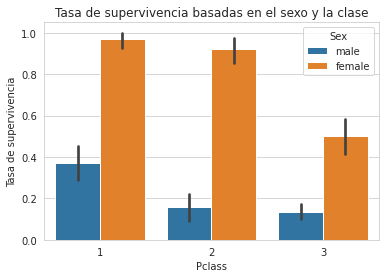

In [ ]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Tasa de supervivencia")
plt.title("Tasa de supervivencia basadas en el sexo y la clase")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

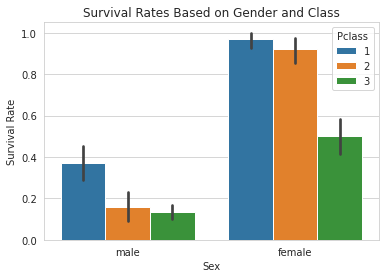

In [ ]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Aparentemente la clase juega un papel importante en la tasa de sobrevivencia. Los pasajeros de Clase 1 tienen mas chances de sobrevivir que los de las otras clases

##### <ins>Edad</ins>

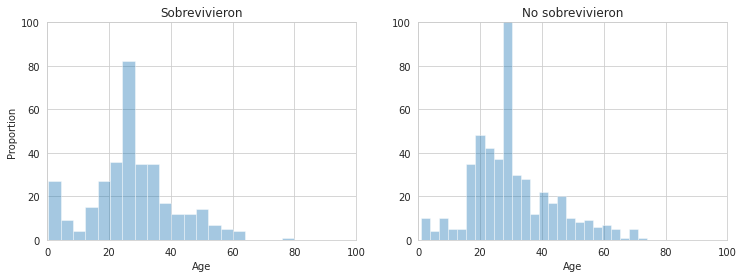

In [ ]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobrevivieron")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobrevivieron")
plt.subplots_adjust(right=1.7)
plt.show()

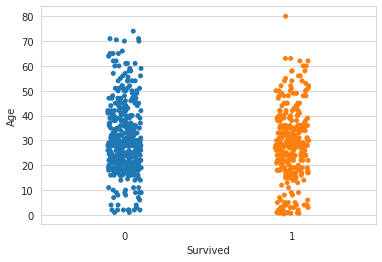

In [ ]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

Parecería que los pasajeros más jóvenes tienen mýs chances de sobrevivir que los mayores, como muestran la gráfica de clustering y el histograma de sobrevivientes.

Finalmente se muestra un resumen de las diferentes gráficas con las relaciones entre todos los atributos de a pares


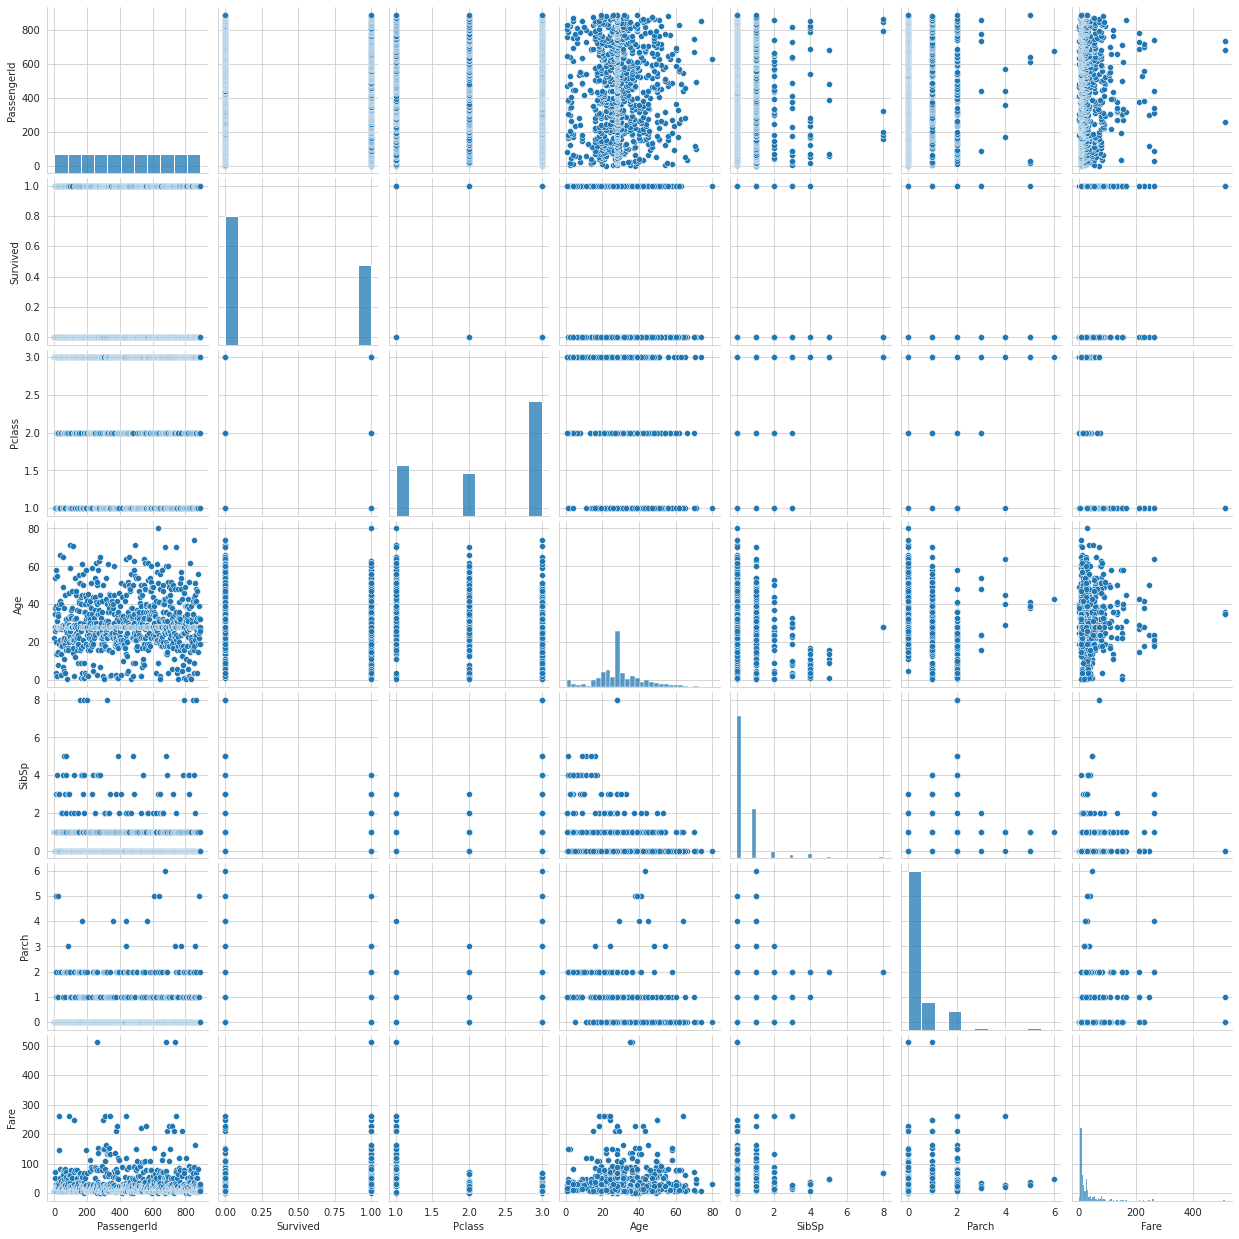

In [ ]:
sns.pairplot(training)

## Feature Engineering

Dado que los campos Sex y Embarked son nominales, debemos convertirlos a numericos para aplicarles el modelo.

In [34]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,28.0,0,0,7.8958,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,28.0,1,0,16.1000,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,7.8958,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,S


In [35]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,39.6875,S
155,1047,3,"Duquemin, Mr. Joseph",male,24.0,0,0,7.5500,S
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,10.5000,S


Cambiamos los campos a binarios, con 1 y 0 como los valores de la categoria, tanto en los datos de training como los de test.



In [36]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [39]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [40]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",0,36.0,1,0,26.0000,2
766,767,0,1,"Brewe, Dr. Arthur Jackson",1,28.0,0,0,39.6000,0
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",1,28.0,0,0,7.8542,2
121,122,0,3,"Moore, Mr. Leonard Charles",1,28.0,0,0,8.0500,2
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",1,45.0,0,0,26.5500,2


In [41]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
249,1141,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",0,27.0,1,0,14.4542,0
93,985,3,"Guest, Mr. Robert",1,27.0,0,0,8.0500,2
331,1223,1,"Dulles, Mr. William Crothers",1,39.0,0,0,29.7000,0
176,1068,2,"Sincock, Miss. Maude",0,20.0,0,0,36.7500,2
363,1255,3,"Strilic, Mr. Ivan",1,27.0,0,0,8.6625,2
